In [26]:
import pandas as pd

data = pd.read_csv('spam.csv')

In [27]:
data.head(10)

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [28]:
X = data['text']
y = data['label']

In [29]:
X.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: text, dtype: object

In [70]:
y.head()

0     ham
1     ham
2    spam
3     ham
4     ham
Name: label, dtype: object

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [72]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4457,)
(1115,)
(4457,)
(1115,)


In [84]:
print(X_train.iloc[0])
print(y_train.iloc[0])

No I'm in the same boat. Still here at my moms. Check me out on yo. I'm half naked.
ham


In [74]:
# Convert text to numbers
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
print(f'Shape of Term Frequency Matrix: {X_train_counts.shape}')

Shape of Term Frequency Matrix: (4457, 7735)


In [75]:
X_train_counts

<4457x7735 sparse matrix of type '<class 'numpy.int64'>'
	with 58978 stored elements in Compressed Sparse Row format>

In [76]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print(f'Shape of TFIDF Matrix: {X_train_tfidf.shape}') 

Shape of TFIDF Matrix: (4457, 7735)


In [77]:
# Machine Learning
# Training Naive Bayes (NB) classifier on training data.
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [78]:
from sklearn.pipeline import Pipeline
# Building a pipeline: We can write less code and do all of the above, by building a pipeline as follows:
text_nb_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])
text_nb_clf = text_nb_clf.fit(X_train, y_train)

In [79]:
import numpy as np
predicted = text_nb_clf.predict(X_test)
naivebayes_clf_accuracy = np.mean(predicted == y_test) * 100.

In [80]:
print(f'Test Accuracy is {naivebayes_clf_accuracy} %')

Test Accuracy is 96.23318385650225 %


In [47]:
from sklearn.linear_model import LogisticRegression as LR

In [48]:
text_lr_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf',LR())])
text_lr_clf = text_lr_clf.fit(X_train, y_train)

In [49]:
lr_predicted = text_lr_clf.predict(X_test)
lr_clf_accuracy = np.mean(lr_predicted == y_test) * 100.
print(f'Test Accuracy is {lr_clf_accuracy}')

Test Accuracy is 96.59192825112108


In [51]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_true=y_test, y_pred=lr_predicted)

In [53]:
# import json
# print(json.dumps(cf.tolist(), indent=2))

cf

array([[964,   1],
       [ 37, 113]], dtype=int64)

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

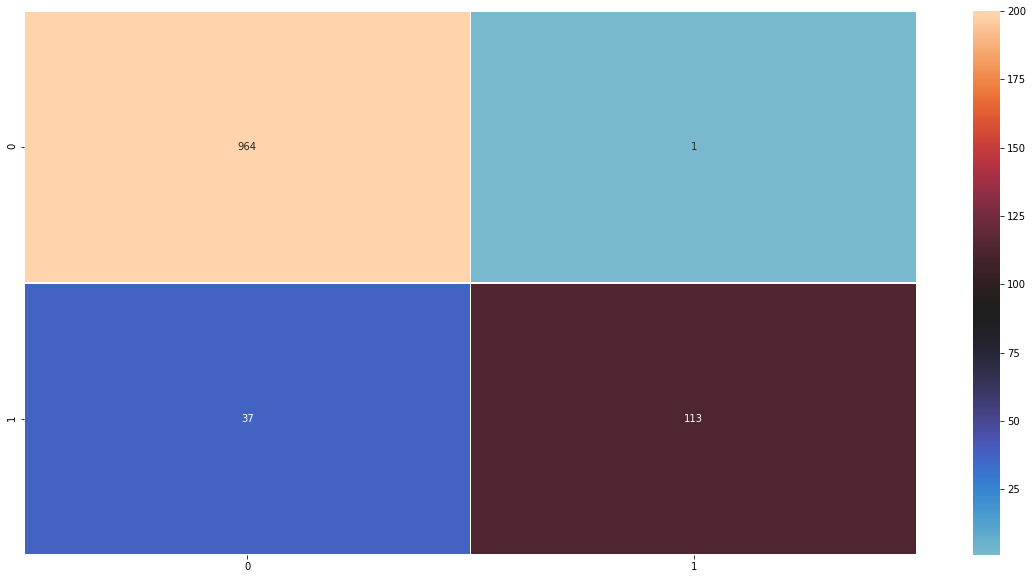

In [55]:
plt.figure(figsize=(20,10))
ax = sns.heatmap(cf, annot=True, fmt="d",linewidths=.5, center = 90, vmax = 200)

In [104]:
test = [X_test.iloc[10]]
test

["For real tho this sucks. I can't even cook my whole electricity is out. And I'm hungry."]

In [106]:
y_test.iloc[10]

'ham'

In [107]:
# count_vect = CountVectorizer()
test_counts = count_vect.fit_transform(test)
print(test_counts)

  (0, 5)	1
  (0, 10)	1
  (0, 13)	1
  (0, 12)	1
  (0, 11)	1
  (0, 1)	1
  (0, 4)	1
  (0, 2)	1
  (0, 8)	1
  (0, 14)	1
  (0, 3)	1
  (0, 7)	1
  (0, 9)	1
  (0, 0)	1
  (0, 6)	1


In [108]:
test_tfidf = tfidf_transformer.fit_transform(test_counts)
print(test_tfidf)

  (0, 14)	0.2581988897471611
  (0, 13)	0.2581988897471611
  (0, 12)	0.2581988897471611
  (0, 11)	0.2581988897471611
  (0, 10)	0.2581988897471611
  (0, 9)	0.2581988897471611
  (0, 8)	0.2581988897471611
  (0, 7)	0.2581988897471611
  (0, 6)	0.2581988897471611
  (0, 5)	0.2581988897471611
  (0, 4)	0.2581988897471611
  (0, 3)	0.2581988897471611
  (0, 2)	0.2581988897471611
  (0, 1)	0.2581988897471611
  (0, 0)	0.2581988897471611


In [109]:
pred = text_nb_clf.predict(test)

In [110]:
pred[0]

'ham'

In [117]:
x = ['Free entry in 2 a wkly comp to win FA Cup final']
x_counts = count_vect.fit_transform(x)
print(x_counts)

  (0, 5)	1
  (0, 2)	1
  (0, 6)	1
  (0, 9)	1
  (0, 0)	1
  (0, 7)	1
  (0, 8)	1
  (0, 3)	1
  (0, 1)	1
  (0, 4)	1


In [118]:
test_tfidf = tfidf_transformer.fit_transform(x_counts)
print(test_tfidf)

  (0, 9)	0.31622776601683794
  (0, 8)	0.31622776601683794
  (0, 7)	0.31622776601683794
  (0, 6)	0.31622776601683794
  (0, 5)	0.31622776601683794
  (0, 4)	0.31622776601683794
  (0, 3)	0.31622776601683794
  (0, 2)	0.31622776601683794
  (0, 1)	0.31622776601683794
  (0, 0)	0.31622776601683794


In [119]:
pred = text_nb_clf.predict(x)
pred[0]

'spam'